# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Import Dataset

In [2]:
data = pd.read_csv("Advertising_Data.csv")

In [3]:
# Make copy of the dataset

df = data.copy()
df.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


This is a regression problem.

# Data preprocessing

In [4]:
# Looking For is dataset containing any null values.

In [5]:
df.isna().sum()

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64

In [6]:
# Check data types
print(df.dtypes)

TV                      float64
Billboards              float64
Google_Ads              float64
Social_Media            float64
Influencer_Marketing    float64
Affiliate_Marketing     float64
Product_Sold            float64
dtype: object


In [7]:
# Display basic information about the dataset

print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


In [8]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
duplicate_count

0

In [9]:
# Display basic statistics before outlier treatment

print("Summary Statistics Before Outlier Treatment:")
df.describe()

Summary Statistics Before Outlier Treatment:


,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000


The average number of products sold is about 7031 units, with a standard deviation of 1703 units, indicating variability in sales figures.

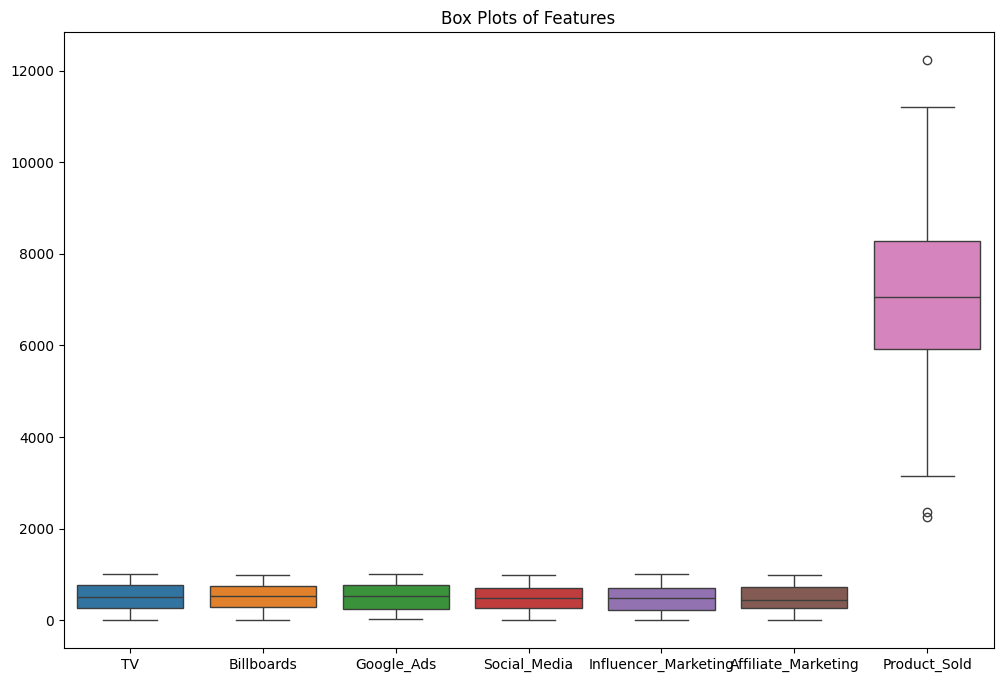

In [10]:
# Display box plots for each feature

plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plots of Features')
plt.show()

<Axes: xlabel='Product_Sold'>

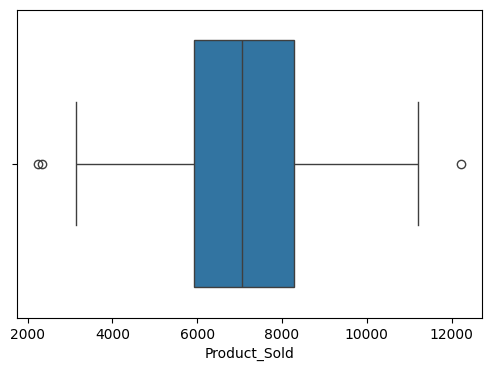

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Product_Sold"])

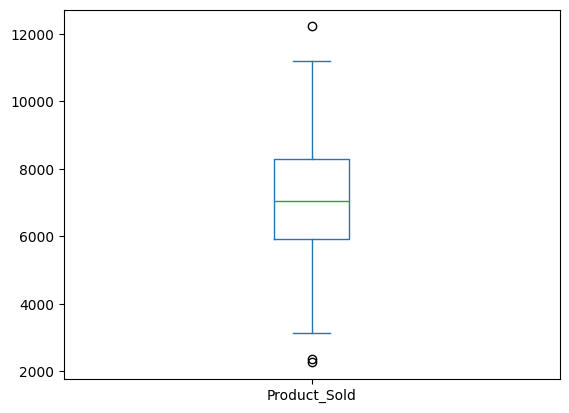

In [12]:
df["Product_Sold"].plot.box()
plt.show()

In [13]:
column_name = 'Product_Sold'


Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

#IQR
IQR = Q3 - Q1


lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

outliers_count = ((df[column_name] < lower_fence) | (df[column_name] > upper_fence)).sum()

print(f"Number of outliers in {column_name} using Tukey's Fences: {outliers_count}")

Number of outliers in Product_Sold using Tukey's Fences: 3


Calculate quartiles for the chosen column

Calculate the interquartile range (IQR)

Define the lower and upper bounds using Tukey's Fences

Count the number of outliers in the chosen column

In [14]:
lower_fence = 2389.25
upper_fence = 11811.25

In [15]:
df["Product_Sold"] = df["Product_Sold"].apply(lambda x: df["Product_Sold"].mean() if x < 2389.25 else x)

In [16]:
df["Product_Sold"] = df["Product_Sold"].apply(lambda x: df["Product_Sold"].mean() if x >11811.25 else x)

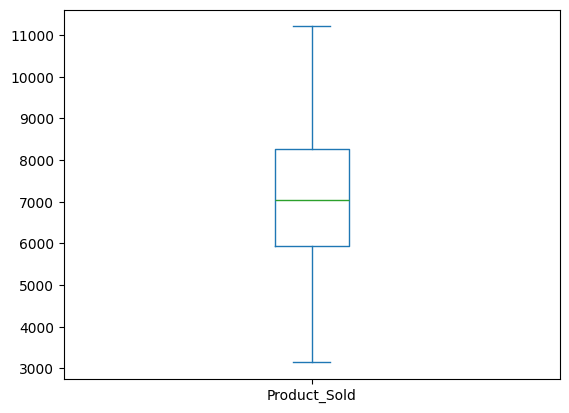

In [17]:
df["Product_Sold"].plot.box()
plt.show()

In [18]:
column_name = 'Product_Sold'


Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)


IQR = Q3 - Q1


lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR


outliers_count = ((df[column_name] < lower_fence) | (df[column_name] > upper_fence)).sum()


print(f"Number of outliers in {column_name} using Tukey's Fences: {outliers_count}")

Number of outliers in Product_Sold using Tukey's Fences: 0


In [19]:
df.shape

(300, 7)

# Data Visualization

<Figure size 800x600 with 0 Axes>

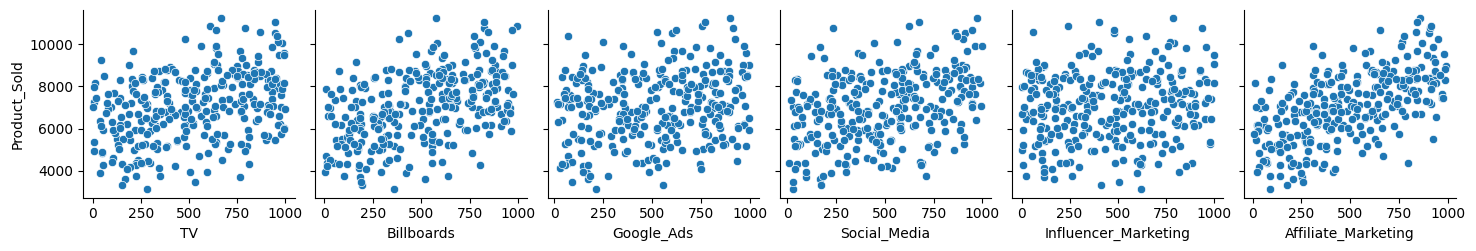

In [20]:
plt.figure(figsize=(8,6))
sns.pairplot(df, x_vars = ['TV','Billboards','Google_Ads','Social_Media','Influencer_Marketing','Affiliate_Marketing'], y_vars = 'Product_Sold')

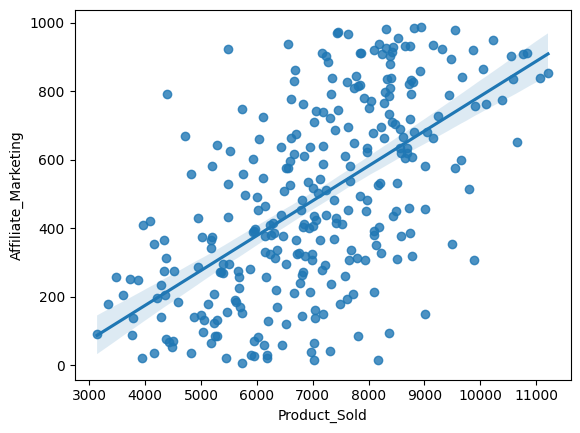

In [21]:
sns.regplot(data= df, x="Product_Sold", y="Affiliate_Marketing")
plt.show()

Visualising the relationship between amount spent on advertising on Affiliate_Marketing and units sold:

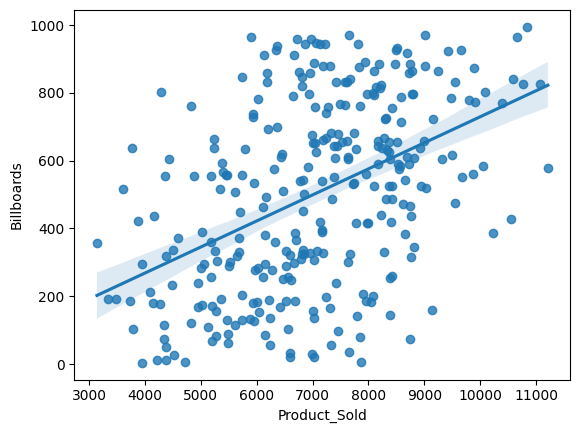

In [22]:
sns.regplot(data = df, x="Product_Sold", y= "Billboards")
plt.show()

Visualising the relationship between amount spent on advertising on Billboards and units sold:

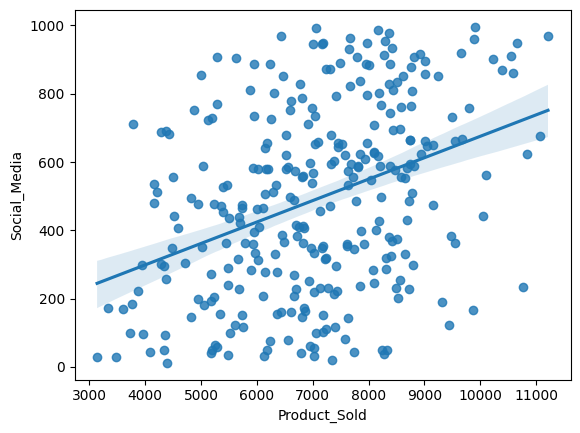

In [23]:
sns.regplot(data= df, x="Product_Sold", y="Social_Media")
plt.show()

Visualising the relationship between amount spent on advertising on Social_Media and units sold:

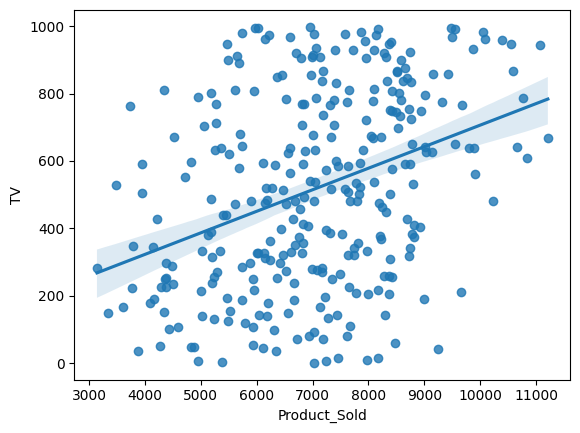

In [24]:
sns.regplot(data = df, x="Product_Sold", y= "TV")
plt.show()

Visualising the relationship between amount spent on advertising on TV and units sold

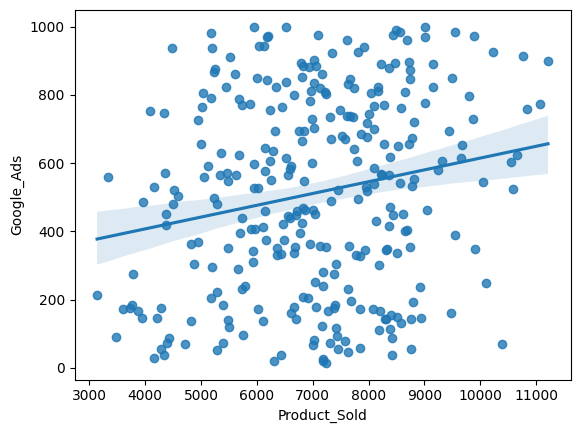

In [25]:
sns.regplot(data= df, x="Product_Sold", y="Google_Ads")
plt.show()

Visualising the relationship between amount spent on advertising on Google_Ads and units sold

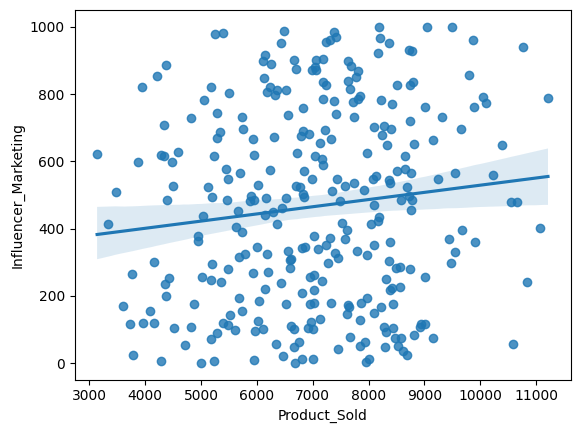

In [26]:
sns.regplot(data= df, x="Product_Sold", y="Influencer_Marketing")
plt.show()

Visualising the relationship between amount spent on advertising on Influencer_Marketing and units sold:

### Insights

Each plot illustrates how the amount spent on different advertising channels relates to the number of products sold.
Generally, when more money is spent on advertising, more products are sold. Among the various advertising channels, 
Affiliate Marketing and Billboards stand out for generating the highest sales amounts when compared to others.

Now let's look the correlation of all columns with the sales column

In [27]:
correlation = data.corr()
print(correlation['Product_Sold'].sort_values(ascending=False))

Product_Sold            1.000000
Affiliate_Marketing     0.611603
Billboards              0.480593
Social_Media            0.401088
TV                      0.374228
Google_Ads              0.203678
Influencer_Marketing    0.140844
Name: Product_Sold, dtype: float64


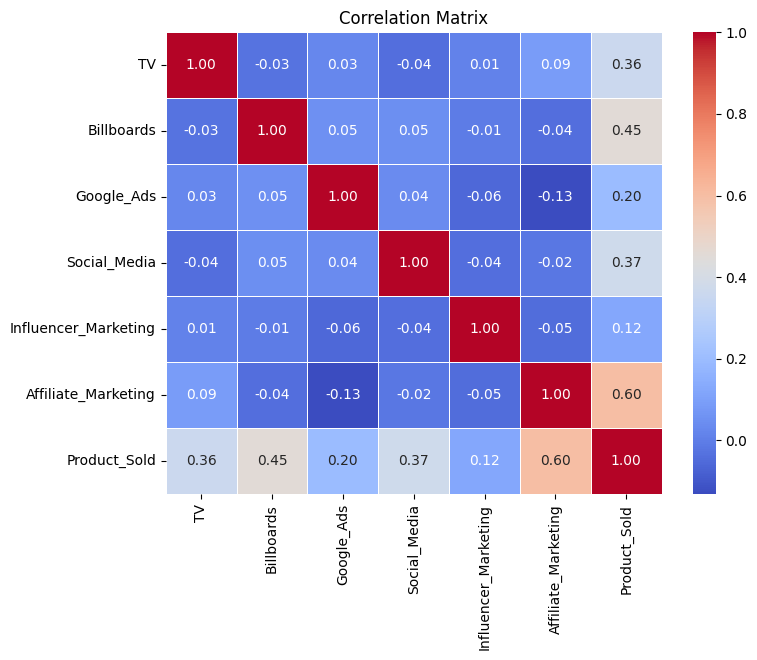

In [28]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Correlation Analysis: The correlation coefficients range from -0.13 to 0.6. Affiliate_Marketing shows the strongest positive correlation with Product_Sold (0.6), suggesting a strong relationship between affiliate marketing spending and sales.

Billboards and Social_Media also show notable positive correlations with sales (0.48 and 0.40, respectively). Other advertising channels like TV and Google_Ads have positive but weaker correlations with sales.

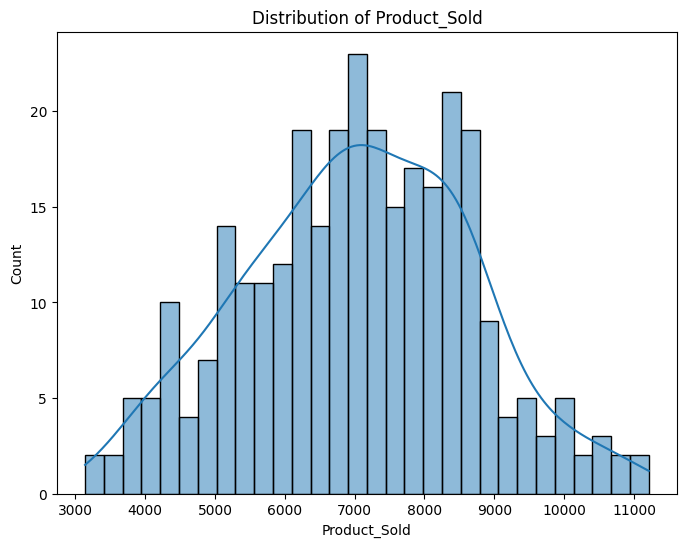

In [83]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['Product_Sold'], bins=30, kde=True)
plt.title('Distribution of Product_Sold')
plt.show()

# Data splitting

Now training ML model to predict the future sales of a product but before training let's split the data into training and test sets.

In [30]:
X = data.drop("Product_Sold",axis=1)
y = data["Product_Sold"]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.20,random_state=144)
print("Training dataset size",len(X_train))
print("Testing dataset size",len(X_test))

Training dataset size 240
Testing dataset size 60


In [32]:
X

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing
0,281.42,538.80,123.94,349.30,242.77,910.10
1,702.97,296.53,558.13,180.55,781.06,132.43
2,313.14,295.94,642.96,505.71,438.91,464.23
3,898.52,61.27,548.73,240.93,278.96,432.27
4,766.52,550.72,651.91,666.33,396.33,841.93
...,...,...,...,...,...,...
295,770.05,501.36,694.60,172.26,572.26,410.56
296,512.38,250.83,373.78,366.95,987.14,509.03
297,998.10,858.75,781.06,60.61,174.63,213.53
298,322.35,681.22,640.29,343.65,534.22,648.71


# Model Building

In [88]:
from sklearn.linear_model import LinearRegression


#### Now train the model to predict future sales

In [89]:
lr = LinearRegression()
rf=RandomForestRegressor()


In [90]:
lr.fit(X,y)

LinearRegression()

In [91]:
y_pred = lr.predict(X)

In [92]:
mean_absolute_error(y, y_pred)

8.211366084571706

In [93]:
r2_score(y, y_pred)

0.9999637541828039

In [94]:
mean_squared_error(y, y_pred)

104.84572210702682

# Model Evaluation

In [95]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9999676897379296


In [96]:
# future_sales = [[TV, Billboards, Google_Ads, Social_Media, Influencer_Marketing, Affiliate_Marketing]]
TV =      241                      
BiBo =    638                      
GooAd =   224                      
SoMe =    250                      
InfMar =  445                      
AffMar =  1110                     
future_sales = np.array([[TV, BiBo, GooAd, SoMe, InfMar, AffMar]])
print('Number of Products Sold ',model.predict(future_sales))


Number of Products Sold  [8330.10405424]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [97]:
TV =      244                      
BiBo =    648                      
GooAd =   234                      
SoMe =    280                      
InfMar =  447                      
AffMar =  1150                     
future_sales = np.array([[TV, BiBo, GooAd, SoMe, InfMar, AffMar]])
print('Number of Products Sold ',model.predict(future_sales))

Number of Products Sold  [8618.48843446]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Affiliate Marketing seems to be the best at boosting sales based on this data. Billboards and Social Media are also good
at getting people to buy things.